<a href="https://colab.research.google.com/github/britu-s/gerador_lotoFacil/blob/main/gerador_lotofacil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Modelo para acerto de Jogos Lotofacil**

*   Tratamento de dados (soma dos concursos, repetições)
*   Analise de frequência e padrões
*   Geração de jogos simulados com base estatística



In [2]:
import requests
import pandas as pd
from tqdm import tqdm

# Descobrir o último concurso da Lotofácil
resp = requests.get("https://servicebus2.caixa.gov.br/portaldeloterias/api/lotofacil")
ultima = resp.json()["numero"]

print("🔢 Último concurso da Lotofácil:", ultima)

dados = []

for n in tqdm(range(1, ultima + 1)):
    url = f"https://servicebus2.caixa.gov.br/portaldeloterias/api/lotofacil/{n}"
    r = requests.get(url)

    if r.status_code == 200:
        j = r.json()
        dezenas = j.get("dezenas")
        data = j.get("dataApuracao")

        # Verifica se tem 15 dezenas e a data existe
        if isinstance(dezenas, list) and len(dezenas) == 15 and data:
            registro = {
                "concurso": j["numero"],
                "data": data,
            }
            # Adiciona colunas B1 a B15
            for i in range(15):
                registro[f"B{i+1}"] = int(dezenas[i])
            dados.append(registro)

# Criar DataFrame com os dados válidos
df = pd.DataFrame(dados)

if "data" in df.columns:
    df["data"] = pd.to_datetime(df["data"], dayfirst=True)
    df.sort_values("concurso", inplace=True)
    df.to_csv("lotofacil_api.csv", index=False)
    print("✅ Arquivo salvo como lotofacil_api.csv")
    display(df.head())
else:
    print("⚠️ Nenhum dado válido foi encontrado.")


🔢 Último concurso da Lotofácil: 3423


100%|██████████| 3423/3423 [20:29<00:00,  2.78it/s]

⚠️ Nenhum dado válido foi encontrado.


In [5]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/damarals/loteria/master/"
    "inst/extdata/lotofacil.csv"
)
df = pd.read_csv(url, sep=",", encoding="utf-8")
print("✅ Carregado com sucesso!")
print("Total de concursos:", len(df))
print("Colunas:", df.columns.tolist())
df.head()


✅ Carregado com sucesso!
Total de concursos: 2609
Colunas: ['data', 'concurso', 'dezena_1', 'dezena_2', 'dezena_3', 'dezena_4', 'dezena_5', 'dezena_6', 'dezena_7', 'dezena_8', 'dezena_9', 'dezena_10', 'dezena_11', 'dezena_12', 'dezena_13', 'dezena_14', 'dezena_15']


,data,concurso,dezena_1,dezena_2,dezena_3,dezena_4,dezena_5,dezena_6,dezena_7,dezena_8,dezena_9,dezena_10,dezena_11,dezena_12,dezena_13,dezena_14,dezena_15
0,2003-09-29,1,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25
1,2003-10-06,2,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24
2,2003-10-13,3,1,4,6,7,8,9,10,11,12,14,16,17,20,23,24
3,2003-10-20,4,1,2,4,5,8,10,12,13,16,17,18,19,23,24,25
4,2003-10-27,5,1,2,4,8,9,11,12,13,15,16,19,20,23,24,25


# **Organizar os dados**

In [6]:
# Renomear as colunas de dezena
novo_nome_colunas = {
    f"dezena_{i}": f"B{i}" for i in range(1, 16)
}
df.rename(columns=novo_nome_colunas, inplace=True)

# Converter data
df["data"] = pd.to_datetime(df["data"], dayfirst=True)

# Garantir que as dezenas sejam inteiras
colunas_dezenas = [f"B{i}" for i in range(1, 16)]
df[colunas_dezenas] = df[colunas_dezenas].astype(int)

# Visualizar
df[["concurso", "data"] + colunas_dezenas].head()


/tmp/ipython-input-6-1753891224.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["data"] = pd.to_datetime(df["data"], dayfirst=True)


,concurso,data,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15
0,1,2003-09-29,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25
1,2,2003-10-06,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24
2,3,2003-10-13,1,4,6,7,8,9,10,11,12,14,16,17,20,23,24
3,4,2003-10-20,1,2,4,5,8,10,12,13,16,17,18,19,23,24,25
4,5,2003-10-27,1,2,4,8,9,11,12,13,15,16,19,20,23,24,25


# **Total linhas e colunas DataFrame**

In [7]:
df.shape

(2609, 17)

# **Ver se há valores nulos**

In [9]:
df.isnull().sum()

,0
data,0
concurso,0
B1,0
B2,0
B3,0
B4,0
B5,0
B6,0
B7,0
B8,0


# **Conferir o inicio e o fim da base**

In [12]:
df.head(3)
df.tail(3)

,data,concurso,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15
2606,2022-08-24,2607,1,3,5,7,8,9,10,14,16,17,18,22,23,24,25
2607,2022-08-25,2608,1,2,4,8,9,11,12,14,15,17,18,19,23,24,25
2608,2022-08-26,2609,3,5,6,7,9,11,12,15,17,18,19,20,21,24,25


# **Ver todas as colunas**

In [15]:
pd.set_option("display.max_columns", None)
df

,data,concurso,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15
0,2003-09-29,1,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25
1,2003-10-06,2,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24
2,2003-10-13,3,1,4,6,7,8,9,10,11,12,14,16,17,20,23,24
3,2003-10-20,4,1,2,4,5,8,10,12,13,16,17,18,19,23,24,25
4,2003-10-27,5,1,2,4,8,9,11,12,13,15,16,19,20,23,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2022-08-22,2605,1,2,5,7,9,11,12,15,16,19,21,22,23,24,25
2605,2022-08-23,2606,3,6,7,8,9,10,11,14,16,18,19,20,21,23,24
2606,2022-08-24,2607,1,3,5,7,8,9,10,14,16,17,18,22,23,24,25
2607,2022-08-25,2608,1,2,4,8,9,11,12,14,15,17,18,19,23,24,25


# **Mostrar todas as linhas (cuidado ao fazer isso em um data set com milhões até meilhares de linhas!)** Aqui vemos que os dados estão atualizados até 26/08/2022 (Trecho excluido para subir no GitHub)

# **Implementar um modelo para gerar jogos ele irá fazer 5 jogos terá analise de frequencia, pares/impares e geração de 5 jogos baseados nos padrões da LotoFácil**

## **Etapa 1.1 – Contar frequência de cada número**

In [20]:
from collections import Counter

# Lista com todas as dezenas sorteadas em todos os concursos
todas_dezenas = df[[f'B{i}' for i in range(1, 16)]].values.flatten()

# Contar a frequência de cada dezena
frequencia = Counter(todas_dezenas)

# Transformar em DataFrame para visualizar melhor
df_freq = pd.DataFrame(sorted(frequencia.items()), columns=['dezena', 'frequencia'])

df_freq.head(10)


,dezena,frequencia
0,1,1556
1,2,1554
2,3,1575
3,4,1566
4,5,1586
5,6,1518
6,7,1527
7,8,1497
8,9,1558
9,10,1618


## **Etapa 1.2 – Visualizar os mais frequentes em ordem decrescente**

In [21]:
df_freq.sort_values("frequencia", ascending=False).reset_index(drop=True).head(10)

,dezena,frequencia
0,20,1623
1,10,1618
2,11,1616
3,25,1607
4,24,1598
5,13,1594
6,14,1594
7,5,1586
8,3,1575
9,4,1566


## **Etapa 1.3 – Gerar gráfico de frequência com Matplotlib**

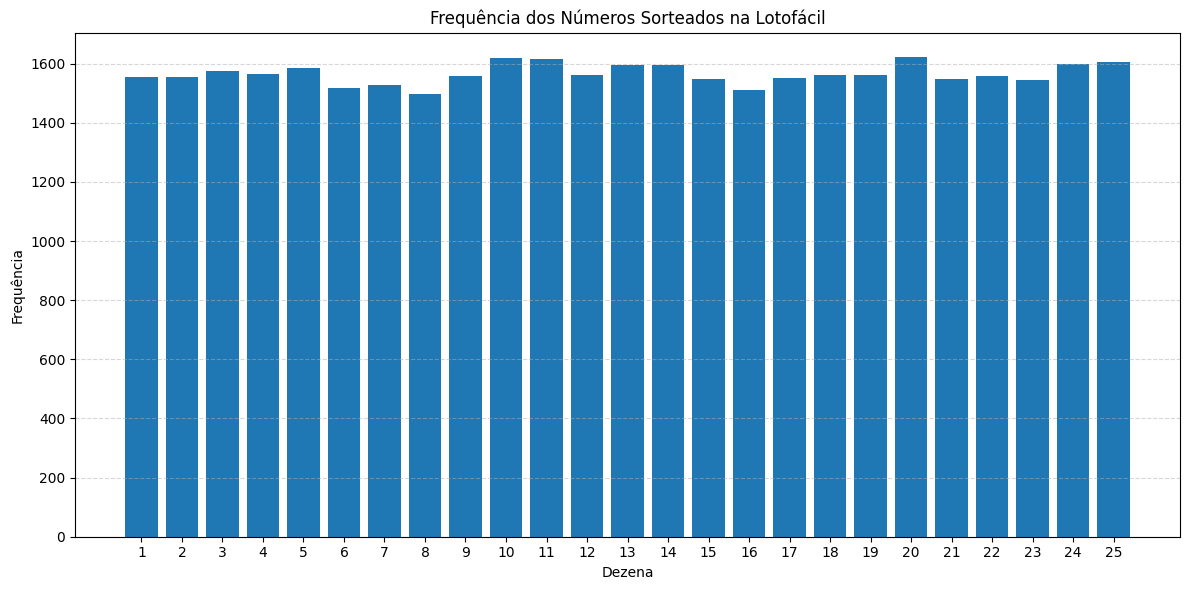

In [22]:
import matplotlib.pyplot as plt

# Ordenar os números por frequência
df_freq_sorted = df_freq.sort_values("frequencia", ascending=False)

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.bar(df_freq_sorted["dezena"], df_freq_sorted["frequencia"])
plt.title("Frequência dos Números Sorteados na Lotofácil")
plt.xlabel("Dezena")
plt.ylabel("Frequência")
plt.xticks(df_freq_sorted["dezena"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# **Objetivo da Etapa 2: Contar pares e ímpares sorteados em cada concurso**

## **Etapa 2.1 – Criar colunas qtde_pares e qtde_impares**

In [23]:
def contar_pares_impares(linha):
    dezenas = linha[[f'B{i}' for i in range(1, 16)]]
    pares = sum(1 for n in dezenas if n % 2 == 0)
    impares = 15 - pares
    return pd.Series({"qtde_pares": pares, "qtde_impares": impares})

# Aplicar a função linha a linha
df[["qtde_pares", "qtde_impares"]] = df.apply(contar_pares_impares, axis=1)

# Verificar as primeiras
df[["concurso", "qtde_pares", "qtde_impares"]].head()


,concurso,qtde_pares,qtde_impares
0,1,8,7
1,2,6,9
2,3,9,6
3,4,8,7
4,5,7,8


# **Etapa 2.2 – Ver os padrões mais comuns**

In [24]:
df.groupby(["qtde_pares", "qtde_impares"]).size().reset_index(name="quantidade").sort_values("quantidade", ascending=False)

,qtde_pares,qtde_impares,quantidade
4,7,8,811
5,8,7,666
3,6,9,545
6,9,6,295
2,5,10,183
7,10,5,69
1,4,11,27
8,11,4,10
0,3,12,3


# **Objetivo da Etapa 3: Calcular e analisar a soma total das dezenas em cada concurso**

## **Etapa 3.1 – Criar coluna soma_dezenas**

In [25]:
colunas_dezenas = [f"B{i}" for i in range(1, 16)]

df["soma_dezenas"] = df[colunas_dezenas].sum(axis=1)

# Visualizar
df[["concurso", "soma_dezenas"]].head()

,concurso,soma_dezenas
0,1,199
1,2,185
2,3,182
3,4,197
4,5,202


## **Etapa 3.3 – Visualizar a distribuição da soma**

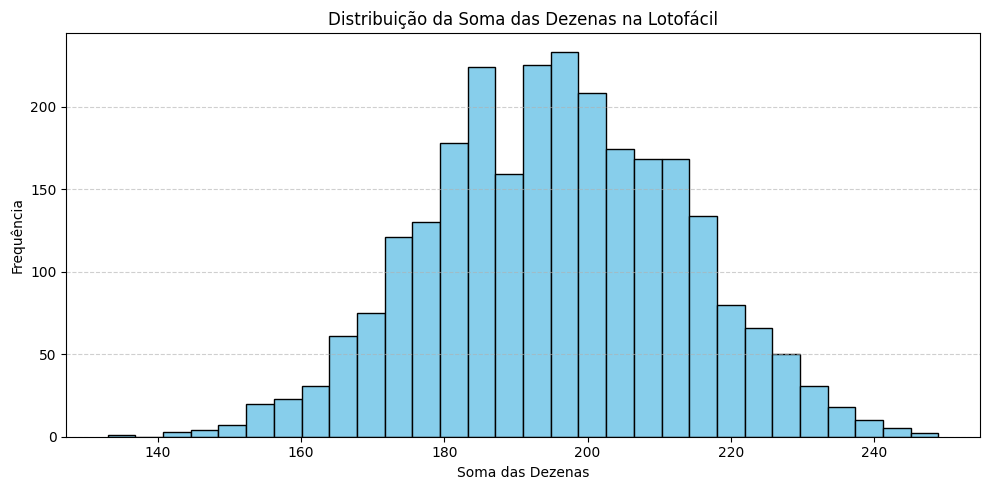

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["soma_dezenas"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribuição da Soma das Dezenas na Lotofácil")
plt.xlabel("Soma das Dezenas")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# **Etapa 4: Gerar 5 jogos com base estatística**



## **Etapa 4.1 – Selecionar as 20 dezenas mais frequentes**

In [27]:
from collections import Counter

# Juntar todas as dezenas em uma lista
todas = df[[f"B{i}" for i in range(1, 16)]].values.flatten()
frequencia = Counter(todas)

# Top 20 números mais frequentes
top_20 = [num for num, freq in frequencia.most_common(20)]
print("🎯 Top 20 dezenas mais frequentes:", sorted(top_20))


🎯 Top 20 dezenas mais frequentes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(24), np.int64(25)]


## **Etapa 4.2 – Função para gerar um jogo válido**

In [28]:
import random

def gerar_jogo_valido(top_20):
    tentativas = 0
    while True:
        jogo = sorted(random.sample(top_20, 15))
        soma = sum(jogo)
        pares = sum(1 for n in jogo if n % 2 == 0)
        impares = 15 - pares

        # Validação por critérios estatísticos
        if 170 <= soma <= 220 and 6 <= pares <= 9:
            return jogo

        tentativas += 1
        if tentativas > 1000:
            break
    return None


## **Etapa 4.3 – Gerar os 5 jogos simulados**

In [29]:
jogos_simulados = []

for i in range(5):
    jogo = gerar_jogo_valido(top_20)
    if jogo:
        jogos_simulados.append(jogo)
    else:
        print(f"⚠️ Não consegui gerar o jogo {i+1}")

# Exibir os jogos
for idx, jogo in enumerate(jogos_simulados, 1):
    print(f"🔢 Jogo {idx}: {jogo}")


🔢 Jogo 1: [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(15), np.int64(17), np.int64(20), np.int64(22), np.int64(24), np.int64(25)]
🔢 Jogo 2: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(10), np.int64(12), np.int64(13), np.int64(14), np.int64(17), np.int64(18), np.int64(20), np.int64(22), np.int64(24), np.int64(25)]
🔢 Jogo 3: [np.int64(1), np.int64(4), np.int64(5), np.int64(9), np.int64(11), np.int64(12), np.int64(14), np.int64(15), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(22), np.int64(24), np.int64(25)]
🔢 Jogo 4: [np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(10), np.int64(11), np.int64(13), np.int64(14), np.int64(15), np.int64(18), np.int64(19), np.int64(21), np.int64(22), np.int64(24), np.int64(25)]
🔢 Jogo 5: [np.int64(1), np.int64(4), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), 

# **Parte 1: Salvar os 5 jogos simulados da Lotofácil em um CSV**

In [30]:
# Cria DataFrame com os jogos simulados
df_jogos = pd.DataFrame(jogos_simulados, columns=[f"B{i}" for i in range(1, 16)])

# Salva em CSV
df_jogos.to_csv("jogos_simulados_lotofacil.csv", index=False)
print("✅ Arquivo salvo como jogos_simulados_lotofacil.csv")
df_jogos


✅ Arquivo salvo como jogos_simulados_lotofacil.csv


,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15
0,2,3,4,5,9,10,11,12,13,15,17,20,22,24,25
1,1,2,3,4,5,10,12,13,14,17,18,20,22,24,25
2,1,4,5,9,11,12,14,15,17,18,19,20,22,24,25
3,1,3,4,5,10,11,13,14,15,18,19,21,22,24,25
4,1,4,9,10,11,12,13,14,15,17,19,21,22,24,25


## **Parte 2: Verificar se algum desses jogos já foi sorteado antes**

In [31]:
# Pega todos os concursos da base original como tuplas
historico = df[[f"B{i}" for i in range(1, 16)]].apply(lambda row: tuple(sorted(row)), axis=1).tolist()

# Compara os jogos simulados com o histórico
for idx, jogo in enumerate(jogos_simulados, 1):
    if tuple(sorted(jogo)) in historico:
        print(f"🎯 Jogo {idx} já foi sorteado antes!")
    else:
        print(f"❌ Jogo {idx} é inédito.")

❌ Jogo 1 é inédito.
❌ Jogo 2 é inédito.
❌ Jogo 3 é inédito.
❌ Jogo 4 é inédito.
❌ Jogo 5 é inédito.
